In [24]:
import torch
import torchvision
from torchvision import transforms
import os
from models.YNet import YNet
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [26]:
def plot_filters_multi_channel(t):
    
    #get the number of kernals
    num_kernels = t.shape[0]    
    
    #define number of columns for subplots
    num_cols = 12
    #rows = num of kernels
    num_rows = num_kernels
    
    #set the figure size
    fig = plt.figure(figsize=(num_cols,num_rows))
    
    #looping through all the kernels
    for i in range(t.shape[0]):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1)
        
        #for each kernel, we convert the tensor to numpy 
        npimg = np.array(t[i].numpy(), np.float32)
        #standardize the numpy image
        npimg = (npimg - np.mean(npimg)) / np.std(npimg)
        npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
        npimg = npimg.transpose((1, 2, 0))
        ax1.imshow(npimg)
        ax1.axis('off')
        ax1.set_title(str(i))
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        
    plt.savefig('myimage.png', dpi=100)    
    plt.tight_layout()
    plt.show()

In [52]:
def plot_filters_single_channel(t):
    
    #kernels depth * number of kernels
    nplots = t.shape[0]*t.shape[1]
    ncols = 12
    
    nrows = 1 + nplots//ncols
    #convert tensor to numpy image
    npimg = np.array(t.numpy(), np.float32)
    
    count = 0
    fig = plt.figure(figsize=(ncols, nrows))
    
    #looping through all the kernels in each channel
    for i in range(t.shape[0]):
        for j in range(3):         #t.shape[1]
            count += 1
            ax1 = fig.add_subplot(nrows, ncols, count)
            npimg = np.array(t[i, j].numpy(), np.float32)
            npimg = (npimg - np.mean(npimg)) / np.std(npimg)
            npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
            ax1.imshow(npimg)
            ax1.set_title(str(i) + ',' + str(j))
            ax1.axis('off')
            ax1.set_xticklabels([])
            ax1.set_yticklabels([])
   
    plt.tight_layout()
    plt.show()

In [11]:
config = {
        "n_classes": 10,
        "batch_size": 128,
        "lr": 1e-3,
        "gradient_clip_val": 0.5,
        "num_epochs": 50,
        "cnn1_in": 3,
        "cnn2_in": 32,
        "cnn3_in": 64,
        "cnn3_out": 128,
        "linear_in": 1024,
        "dropout": 0.5,
        "kernel_size": 3
    }
dataset='cifar10'
PATH = f"/home/gaurangajitk/DL/cnn_YNet/model_checkpoint/best_checkpoint_{dataset}.pth"

In [33]:
model = YNet(config)

In [34]:
checkpoint = torch.load(PATH, map_location='cpu')
model.load_state_dict(checkpoint['model'])

<All keys matched successfully>

In [50]:
filter = model.cnn_left.conv2.weight.data
filter.shape

torch.Size([64, 32, 3, 3])

TypeError: Invalid shape (3, 3, 32) for image data

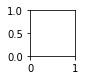

In [47]:
plot_filters_multi_channel(filter)

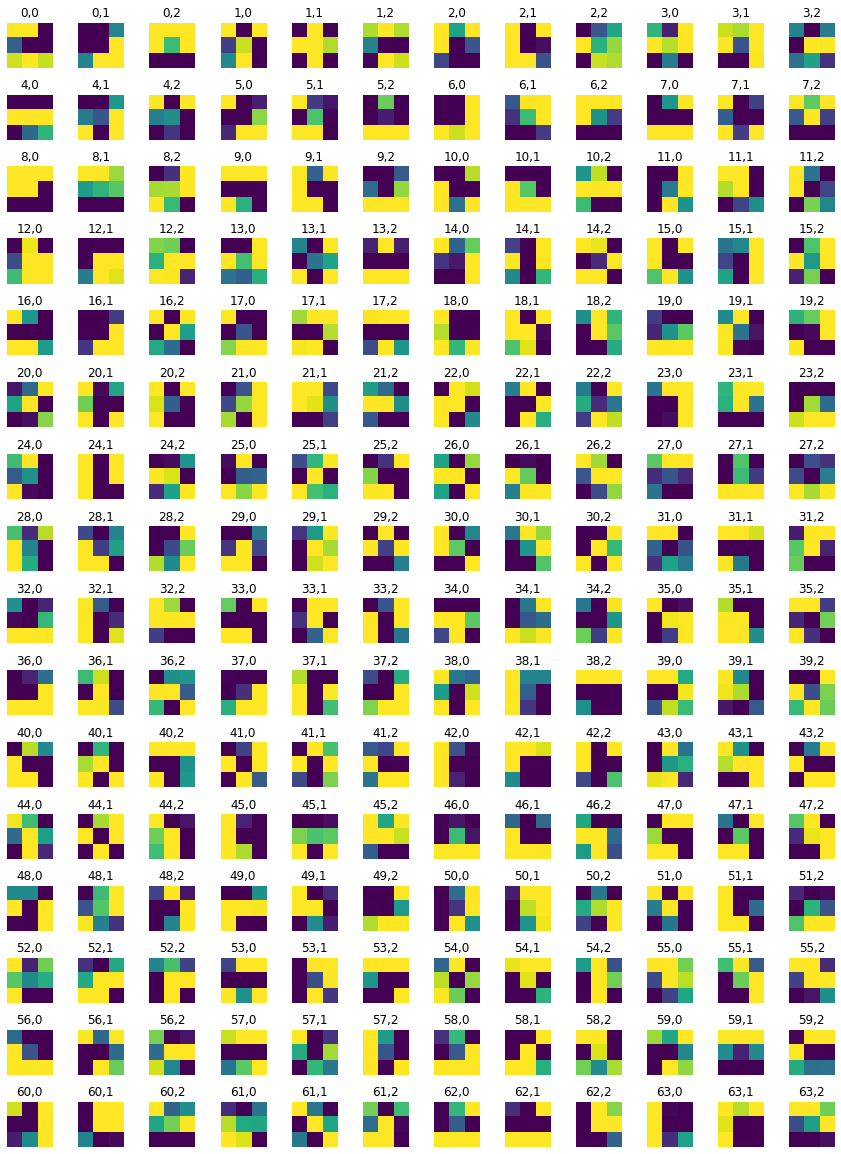

In [53]:
plot_filters_single_channel(filter)